In [1]:
#importando as libs
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#lendo o dataset
autism_data = pd.read_csv("Autism_Data.csv")

#testando pra ver se está tudo certo
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [2]:
#verificando se há valores faltosos
autism_data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [3]:
#identificando a quantidade de valores duplicados
autism_data.duplicated().sum()

5

In [4]:
#removendo valores duplicados
autism_data = autism_data.drop_duplicates(keep='last')

In [5]:
#identificando a quantidade de valores duplicados
autism_data.duplicated().sum()

0

In [6]:
#para correlacionar é preciso que todas as variaveis sejam numericas
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           699 non-null int64
A2_Score           699 non-null int64
A3_Score           699 non-null int64
A4_Score           699 non-null int64
A5_Score           699 non-null int64
A6_Score           699 non-null int64
A7_Score           699 non-null int64
A8_Score           699 non-null int64
A9_Score           699 non-null int64
A10_Score          699 non-null int64
age                699 non-null object
gender             699 non-null object
ethnicity          699 non-null object
jundice            699 non-null object
austim             699 non-null object
contry_of_res      699 non-null object
used_app_before    699 non-null object
result             699 non-null int64
age_desc           699 non-null object
relation           699 non-null object
Class/ASD          699 non-null object
dtypes: int64(11), object(10)
memory usage: 120.1+ KB


In [7]:
#renomeando a coluna com o resultado do teste
autism_data = autism_data.rename(columns={'Class/ASD': 'has_autism'})

In [8]:
#retirando o restante das colunas
autism_data = autism_data.drop(['used_app_before','result', 'age_desc', 'relation', 'ethnicity', 'age', 'contry_of_res'], axis=1) 

In [9]:
#transformando os varores de 'gender' em 1 para f e em 0 para m
autism_data["gender"] = autism_data["gender"].replace("f", 1)
autism_data["gender"] = autism_data["gender"].replace("m", 0)

#transformando valores de 'austim'
autism_data["austim"] = autism_data["austim"].replace("yes", 1)
autism_data["austim"] = autism_data["austim"].replace("no", 0)

#transformando valores de 'has_autism' em 1 para YES e em 0 para NO
autism_data["has_autism"] = autism_data["has_autism"].replace("YES", 1)
autism_data["has_autism"] = autism_data["has_autism"].replace("NO", 0)

#transformando valores de 'jundice' em 1 para YES e em 0 para NO
autism_data["jundice"] = autism_data["jundice"].replace("yes", 1)
autism_data["jundice"] = autism_data["jundice"].replace("no", 0)

In [10]:
#alterando o valor de 'object' para 'int'
autism_data['has_autism'].astype(str).astype(int)

0      0
1      0
2      1
3      0
4      0
5      1
6      0
7      0
8      0
9      1
10     1
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
674    0
675    0
676    0
677    0
678    1
679    1
680    1
681    1
682    0
683    0
684    0
685    1
686    0
687    1
688    1
689    1
690    0
691    0
692    1
693    0
694    1
695    0
696    1
697    0
698    1
699    1
700    0
701    1
702    0
703    1
Name: has_autism, Length: 699, dtype: int32

In [11]:
#todos os dados prontos
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 14 columns):
A1_Score      699 non-null int64
A2_Score      699 non-null int64
A3_Score      699 non-null int64
A4_Score      699 non-null int64
A5_Score      699 non-null int64
A6_Score      699 non-null int64
A7_Score      699 non-null int64
A8_Score      699 non-null int64
A9_Score      699 non-null int64
A10_Score     699 non-null int64
gender        699 non-null int64
jundice       699 non-null int64
austim        699 non-null int64
has_autism    699 non-null int64
dtypes: int64(14)
memory usage: 81.9 KB


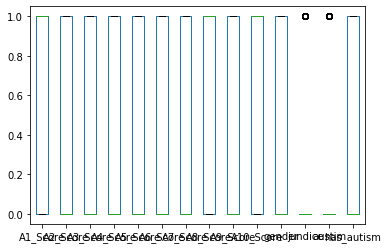

In [12]:
#plotando gráficos para a identificação de outliers
autism_data.plot(kind='box')
plt.show()

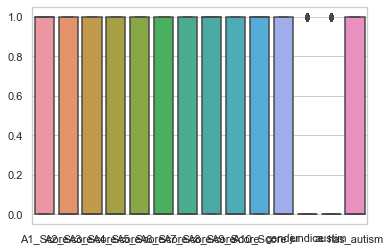

In [13]:
#plotando gráficos para a identificação de outliers
%matplotlib inline

sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=autism_data)

In [14]:
#correlação de uma variavel para todas as outras
autism_data.corr().style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'),axis=1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,jundice,austim,has_autism
A1_Score,1.0,0.0085,0.071,0.13,0.17,0.11,0.22,0.14,0.15,0.12,0.078,-0.018,0.097,0.3
A2_Score,0.0085,1.0,0.22,0.16,0.15,0.18,-0.042,0.032,0.2,0.069,0.055,0.11,0.072,0.31
A3_Score,0.071,0.22,1.0,0.41,0.27,0.27,0.079,0.014,0.31,0.17,0.0066,0.064,0.11,0.44
A4_Score,0.13,0.16,0.41,1.0,0.31,0.29,0.15,0.0097,0.32,0.21,0.058,0.065,0.19,0.47
A5_Score,0.17,0.15,0.27,0.31,1.0,0.39,0.24,0.099,0.4,0.27,0.041,0.036,0.088,0.54
A6_Score,0.11,0.18,0.27,0.29,0.39,1.0,0.17,0.099,0.48,0.29,0.088,0.079,0.11,0.59
A7_Score,0.22,-0.042,0.079,0.15,0.24,0.17,1.0,0.084,0.19,0.25,-0.063,0.032,-0.013,0.35
A8_Score,0.14,0.032,0.014,0.0097,0.099,0.099,0.084,1.0,0.1,0.1,-0.062,0.014,0.034,0.24
A9_Score,0.15,0.2,0.31,0.32,0.4,0.48,0.19,0.1,1.0,0.28,-0.0039,0.058,0.16,0.63
A10_Score,0.12,0.069,0.17,0.21,0.27,0.29,0.25,0.1,0.28,1.0,0.057,0.052,0.11,0.38


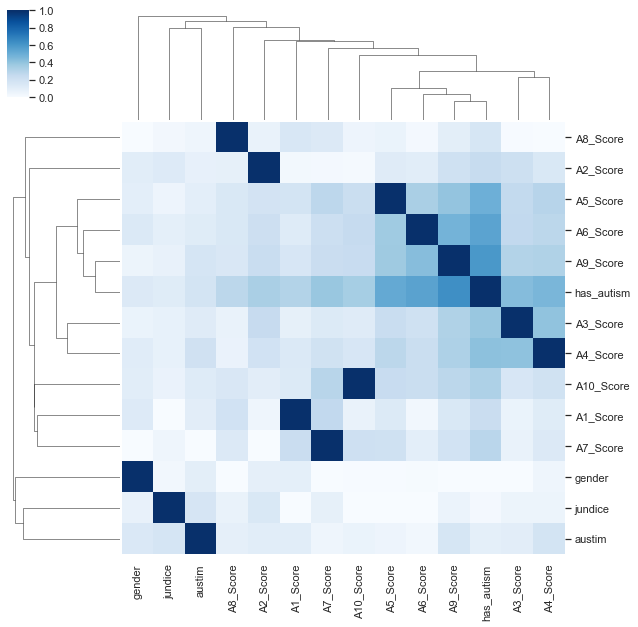

In [15]:
#o gráfico demonstra o grau de relacionamento entre as variáveis
sns.clustermap(autism_data.corr(), metric="correlation", method="single", cmap="Blues", standard_scale=1)

In [16]:
#'has_autism' tem forte relação com 'A9_Score'
#em seguida de A6_Score e A5_Score juntamente com A4_Score

In [17]:
## testes de PCA -- ignorar daqui

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
____________________________________________________________________________
O número de colunas exclusivas é: 13
____________________________________________________________________________
[ 21.73267302  36.34669389  49.75604673  62.50642889  74.46753252
  85.98530351  97.26255819 107.66788511 117.75714221 127.78064822
 136.59993385 145.16539399 152.53894899]
____________________________________________________________________________
[21.73267302 14.61402087 13.40935284 12.75038215 11.96110363 11.517771
 11.27725468 10.40532692 10.08925709 10.02350602  8.81928562  8.56546015
  7.373555  ]
____________________________________________________________________________


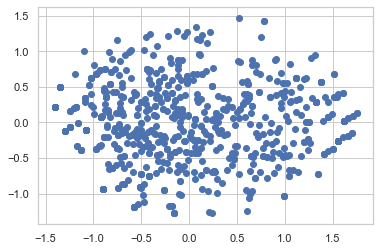

In [18]:
#01
#gerando bases através da redução de dimensionalidade via PCA
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
pca = PCA(n_components=None)

num_autism_data = autism_data.iloc[:,:13]

print(pca.fit(num_autism_data))

T = pca.transform(num_autism_data)

print("____________________________________________________________________________")
print("O número de colunas exclusivas é:", T.shape[1])

#Os valores singulares correspondentes a cada um dos componentes selecionados.
#Os valores singulares são iguais às 2 normas das variáveis n_components no espaço de menor dimensão.
print("____________________________________________________________________________")
print(np.cumsum(pca.singular_values_))
print("____________________________________________________________________________")
print(pca.singular_values_)
print("____________________________________________________________________________")
plt.scatter(T[:,0], T[:,1])

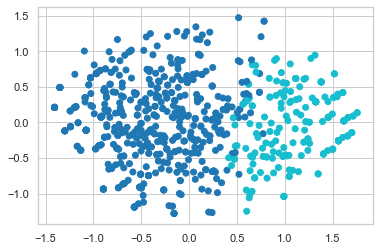

In [19]:
def cores_para_categorias(valores):
    cores = {key: index for index, key in enumerate(valores.unique())}
    return valores.apply(lambda x: cores[x])

plt.scatter(T[:,0], T[:,1], c=cores_para_categorias(autism_data.has_autism), cmap='tab10')

In [20]:
print(pca.singular_values_)

[21.73267302 14.61402087 13.40935284 12.75038215 11.96110363 11.517771
 11.27725468 10.40532692 10.08925709 10.02350602  8.81928562  8.56546015
  7.373555  ]


In [21]:
print("O número de colunas exclusivas é:", T.shape[1])
print(np.cumsum(pca.explained_variance_ratio_))

O número de colunas exclusivas é: 13
[0.24255608 0.35223554 0.44457801 0.52806759 0.60154069 0.66966824
 0.73498019 0.79058307 0.8428593  0.89445638 0.93440049 0.97207844
 1.        ]


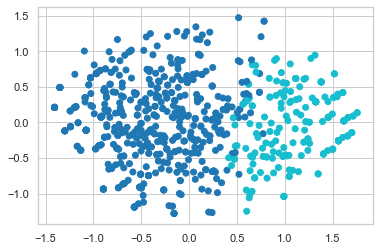

In [22]:
#testando dados transformados em uma mesma escala
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca = make_pipeline(StandardScaler(), PCA(n_components=2))
pca.fit(num_autism_data)
r2 = pca.transform(num_autism_data)

plt.scatter(T[:,0], T[:,1], c=cores_para_categorias(autism_data.has_autism), cmap='tab10')

(-0.8, 0.6)

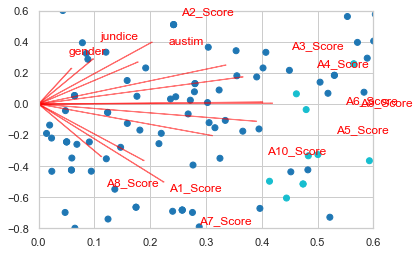

In [30]:
pca = PCA(n_components=4)
pipe = make_pipeline(StandardScaler(), pca)

pipe.fit(num_autism_data)
r2 = pipe.transform(num_autism_data)

plt.scatter(T[:,0], T[:,1], c=cores_para_categorias(autism_data.has_autism), cmap='tab10')

coeff = np.transpose(pca.components_)
for i in range(13):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'red',alpha = 0.5)
    plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, autism_data.columns[i], color = 'red', ha = 'center', va = 'center')


plt.xlim(0,0.6)
plt.ylim(-0.8,0.6)

In [25]:
# Aparentemente o melhoramento mais significativo para o modelo de regressão é adicionando as variaveis:
# A9_Score, A6_Score, A5_Score e A4_Score
# pode-se propor um novo teste mas ponderando o valor das repostas, um AQ10 ponderado

# Ou então escrever que o modelo com x/10 variaveis explica y% do resultado.

In [26]:
## testes de PCA -- até aqui

In [27]:
#03 bases para redução de dimensionalidade via PCA
X_or1 = autism_data.loc[:,['A3_Score','A4_Score','A5_Score','A6_Score','A9_Score']]
 
X_or2 = autism_data.loc[:,['A1_Score','A2_Score','A7_Score','A8_Score','A10_Score']]

X_or3 = autism_data.loc[:,['A9_Score','A6_Score','A4_Score','A7_Score','A10_Score']]

X = autism_data.iloc[:,0:10]
y = autism_data.has_autism

Xy_data = autism_data.drop(['gender', 'jundice', 'austim'], axis=1)

target_class = [0 ,1]


In [28]:
#correlação para cada base

In [29]:
X_or1.corr().style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'),axis=1)

,A3_Score,A4_Score,A5_Score,A6_Score,A9_Score
A3_Score,1.0,0.41,0.27,0.27,0.31
A4_Score,0.41,1.0,0.31,0.29,0.32
A5_Score,0.27,0.31,1.0,0.39,0.4
A6_Score,0.27,0.29,0.39,1.0,0.48
A9_Score,0.31,0.32,0.4,0.48,1.0


In [30]:
X_or2.corr().style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'),axis=1)

,A1_Score,A2_Score,A7_Score,A8_Score,A10_Score
A1_Score,1.0,0.0085,0.22,0.14,0.12
A2_Score,0.0085,1.0,-0.042,0.032,0.069
A7_Score,0.22,-0.042,1.0,0.084,0.25
A8_Score,0.14,0.032,0.084,1.0,0.1
A10_Score,0.12,0.069,0.25,0.1,1.0


In [31]:
X_or3.corr().style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'),axis=1)

,A9_Score,A6_Score,A4_Score,A7_Score,A10_Score
A9_Score,1.0,0.48,0.32,0.19,0.28
A6_Score,0.48,1.0,0.29,0.17,0.29
A4_Score,0.32,0.29,1.0,0.15,0.21
A7_Score,0.19,0.17,0.15,1.0,0.25
A10_Score,0.28,0.29,0.21,0.25,1.0


In [32]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components = 5) #quantidade de atributos

#Ajuste o modelo com e aplique a redução de dimensionalidade
X_r = pca.fit(X).transform(X)
X_r1 = pca.fit(X_or1).transform(X_or1)
X_r2 = pca.fit(X_or2).transform(X_or2)
X_r3 = pca.fit(X_or3).transform(X_or3)

taxa de variação:  [0.40904596 0.19295052 0.15904556 0.14393641 0.09502154]


Text(0.5, 1.0, 'PCA do Dataset')

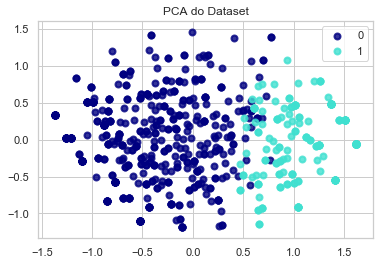

In [32]:
print("taxa de variação: ", pca.explained_variance_ratio_)

target_class = [0 ,1]

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_class in zip(colors, [0, 1], target_class):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_class)

plt.legend(loc='best', shadow=False)

plt.title('PCA do Dataset')    

Text(0.5, 1.0, 'Dataset 01')

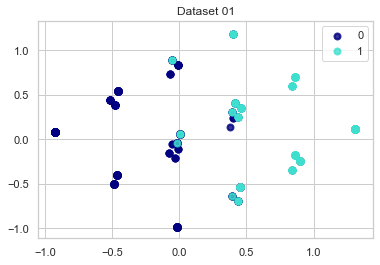

In [33]:
target_class = [0 ,1]

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_class in zip(colors, [0, 1], target_class):
    plt.scatter(X_r1[y == i, 0], X_r1[y == i, 1], color=color, alpha=.8, lw=lw, label=target_class)

plt.legend(loc='best', shadow=False)

plt.title('Dataset 01')

Text(0.5, 1.0, 'Dataset 02')

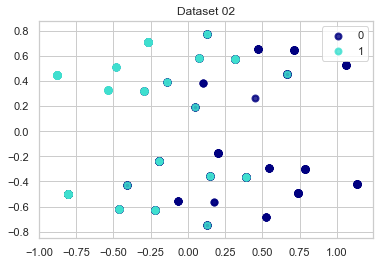

In [34]:
target_class = [0 ,1]

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_class in zip(colors, [0, 1], target_class):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw, label=target_class)

plt.legend(loc='best', shadow=False)

plt.title('Dataset 02')

Text(0.5, 1.0, 'Dataset 03')

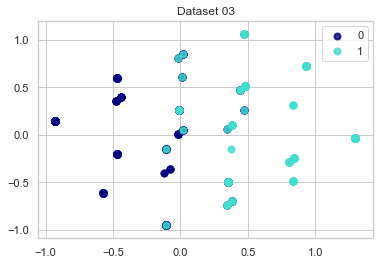

In [35]:
target_class = [0 ,1]

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_class in zip(colors, [0, 1], target_class):
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], color=color, alpha=.8, lw=lw, label=target_class)

plt.legend(loc='best', shadow=False)

plt.title('Dataset 03')

In [36]:
#cross validation using train_test_split em toda a base
from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

svmlassifier = svm.SVC().fit(X_train, y_train)
#svmlassifier.fit(X_train, y_train)
svmlassifier.score(X_test, y_test)

0.9785714285714285

In [37]:
#cross validation using cross_val_score em toda a base
from sklearn.model_selection import cross_val_score
svmlassifier = svm.SVC(C=1)
scores_X = cross_val_score(svmlassifier, X, y, cv=5)
scores_X

array([0.9858156 , 0.96453901, 0.98561151, 1.        , 0.97841727])

In [38]:
#SVM - Regressão - com Cross Validation

In [39]:
#SVM para todo o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

svmlassifier = svm.SVC(C=1)
svmlassifier.fit(X_train, y_train)
svmlassifier.score(X_test, y_test)

0.9785714285714285

In [40]:
#KNN - K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred = classifier.predict(x_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99  5]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       104
           1       0.87      0.94      0.91        36

    accuracy                           0.95       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



In [45]:
classifier2 = KNeighborsClassifier(n_neighbors = 9)
classifier2.fit(x_train, y_train)
y_pred2 = classifier2.predict(x_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[99  5]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       104
           1       0.87      0.94      0.91        36

    accuracy                           0.95       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



In [46]:
#Árvore de Decisão
#Baseado no Slide

In [47]:
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

le = LabelEncoder()

le.fit(Xy_data['has_autism'].values)
y = le.transform(Xy_data['has_autism'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=10)

In [48]:
tree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,min_samples_split=5,max_depth=None,random_state=10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))
score=cross_val_score(tree, X, y, cv=10)

DecisionTreeClassifier accuracy score: 0.9214285714285714


In [49]:
print("Accuracy: %0.5f (+/- %0.5f)" % (score.mean(), score.std() * 2))

Accuracy: 0.92563 (+/- 0.04389)


In [50]:
#plot da árvore

#def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
#    label_names = pd.unique(dataframe[label_col])
# # Obtaining plot data.
#    graph_data = export_graphviz(tree,feature_names=dataframe.drop(label_col,axis=1).columns,class_names=label_names,filled=True,rounded=True,out_file=None)
# # Generating plot.
#    graph = graphviz.Source(graph_data)
#    graph.render(plot_title)
#    return graph
#tree_graph = plot_tree(tree, Xy_data, 'has_autism', le, 'ASD Tree')
#tree_graph

In [51]:
#Árvore de Decisão
#Baseado na web

In [52]:
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
#plot da árvore

#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(dtree, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [54]:
#Naive Bayes
import numpy as np
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X, y)

clf_pf = GaussianNB()
clf_pf.partial_fit(X, y, np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34,random_state=10)
cv_results = cross_val_score(clf_pf, X_train, y_train,cv = 10,scoring = "accuracy",verbose = 2)

print("media de acuracia",cv_results.mean())
print('desvio padrão medio:',cv_results.std())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [55]:
print(clf_pf.predict([[1,1,1,1,1,0,0,0,1,0]]))

[1]


In [56]:
#Rede Neural
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf.fit(X, y)
print(clf.predict([[1,1,1,1,1,1,0,0,1,0]]))
print(clf.predict([[1,0,0,1,1,0,0,0,1,0]]))

[1]
[0]


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

scaler = StandardScaler()
#iris.data.reshape(-1,1)
scaler.fit(X)
baseX=scaler.transform(X)

model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1,learning_rate='constant',max_iter=100)
model.fit(X,y)
scores = cross_val_score(model, X, y, cv=10)

print("media de acuracia:", scores.mean())
print("desvio padrão medio:", scores.std())

media de acuracia: 0.9985507246376812
desvio padrão medio: 0.004347826086956508


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neural_network import MLPRegressor

est = MLPRegressor(hidden_layer_sizes=(15,2), max_iter=700, learning_rate_init=0.0001)
est.fit(X,y)
cross_val_score(est, X, y, cv=10)

est.predict([[1,0,0,1,1,0,0,0,1,0]])

array([0.0138504])

In [59]:
#K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,

In [60]:
kmeans.predict([[1,0,0,1,1,0,0,0,1,0], [1,0,1,1,1,0,0,0,1,0]])

array([0, 1])

In [61]:
kmeans.cluster_centers_

array([[0.64399093, 0.3446712 , 0.26984127, 0.3106576 , 0.25396825,
        0.07482993, 0.29931973, 0.57369615, 0.08843537, 0.41496599],
       [0.84883721, 0.63178295, 0.77131783, 0.81395349, 0.91085271,
        0.63953488, 0.61627907, 0.77131783, 0.7248062 , 0.84883721]])

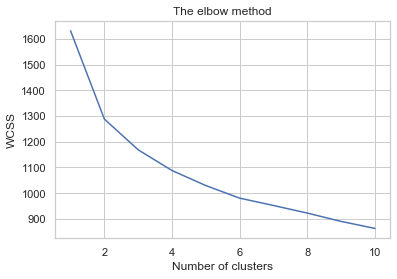

In [62]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init= 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

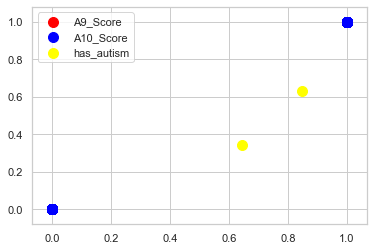

In [65]:
#Resultados Individuais

#SMV
    #accuracy score: 0.9785714285714285

#KNN 
    #              precision    recall  f1-score   support
    #
    #           0       0.97      0.95      0.96       103
    #           1       0.87      0.92      0.89        37
    #
    #    accuracy                           0.94       140
    #   macro avg       0.92      0.94      0.93       140
    #weighted avg       0.94      0.94      0.94       140

#Árvore de Decisão
    #accuracy score: 0.9214285714285714
    
#Rede Neural/MLP
    #media de acuracia: 0.9985507246376812
    #desvio padrão medio: 0.004347826086956508
    
#Naive Bayes
    #media de acuracia 0.960815088909446
    #desvio padrão medio: 0.03621285311643785

In [91]:
#Comitês Homogêneos

In [85]:
#Bagging para tamanho 5

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = KNeighborsClassifier() # Classificador

num_trees = 5 # numero de classificadores

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)

results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = DecisionTreeClassifier() # Classificador

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)

results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = MLPClassifier() # Classificador

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)
results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

0.9642028985507247
0.02419180904480176
0.9470600414078675
0.018147809888307175
0.9928364389233956
0.007163800424441233


In [86]:
#Bagging para tamanho 10

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = KNeighborsClassifier() # Classificador

num_trees = 10 # numero de classificadores

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)

results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = DecisionTreeClassifier() # Classificador

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)

results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = MLPClassifier() # Classificador

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)
results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

0.967080745341615
0.018161728592811743
0.9484886128364389
0.019404081932367437
0.9928364389233956
0.007163800424441233


In [87]:
#Bagging para tamanhotamanho 20

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = KNeighborsClassifier() # Classificador

num_trees = 20 # numero de classificadores

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)

results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = DecisionTreeClassifier() # Classificador

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)

results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

kfold = model_selection.KFold(n_splits=10, random_state=0)

cart = MLPClassifier() # Classificador

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)
results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results.mean())
print(results.std())

0.9671014492753625
0.019210628881609487
0.9599378881987578
0.022865664762981335
0.9928364389233956
0.007163800424441233


In [88]:
#AdaBoost w/ tree para 5

from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 5
model1 = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(model1,n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())
print(results.std())

0.9413664596273292
0.0173828728452418


In [90]:
#AdaBoost w/ tree para 10

from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 10
model1 = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(model1,n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())
print(results.std())

0.9413664596273292
0.0173828728452418


In [83]:
#AdaBoost w/ tree para 20

from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 20
model1 = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(model1,n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())
print(results.std())

0.9413664596273292
0.0173828728452418


In [75]:
#MLP, KNN e AD com Votação

from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=seed)

# Fitting a Decision Tree.
tree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, random_state=seed)
tree.fit(X_train, y_train)

# Fitting a MLP.
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=seed)
mlp.fit(X_train, y_train)

# Fitting a kNN.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fitting a Voting Classifier by combining the three above classifiers.
voting_clf = VotingClassifier(estimators=[('Tree', tree), ('MLP', mlp), ('kNN', knn)], voting='hard')
voting_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(voting_clf,X,y,cv=10)
results.mean()

0.9799994167905988

In [79]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []

model1 = LogisticRegression(n_estimators=num_trees)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC(gamma='auto')
estimators.append(('svm', model3))

model4 = KNeighborsClassifier()
estimators.append(('KNN', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())
print(results.std())

0.9856728778467909
0.015687462274552602


In [80]:
#Comitês Heterogêneos

In [93]:
#Stacking
from mlxtend.classifier import StackingClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_Ada.data, iris_Ada.target, test_size=0.34, random_state=seed)

clf1 = KNeighborsClassifier()
clf2 = DecisionTreeClassifier()
clf3 = LinearSVC()

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')

clf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)

clf.fit(X_train, y_train).score(X_test, y_test)

results1 = model_selection.cross_val_score(clf,iris_Ada.data,iris_Ada.target,cv=10)
print("Meta Classificador: LR",results1.mean())

clf4 = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=clf3)

results2 = model_selection.cross_val_score(clf4,iris_Ada.data,iris_Ada.target,cv=10)

clf4.fit(X_train, y_train).score(X_test, y_test)

print("Meta Classificador: SVC",results2.mean())

ModuleNotFoundError: No module named 'mlxtend'

In [94]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = LinearRegression() # cria o modelo
regr.fit(X_train, y_train) # treina o modelo
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

plt.scatter(y=res, x=y_hat, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-10, xmax=15, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

R2 no set de treino: 0.69
R2 no set de teste: 0.70
